In [622]:
import pandas as pd
import numpy as np
from io import StringIO
%matplotlib inline
from rdflib import Graph,URIRef
from gastrodon import LocalEndpoint,one,QName
pd.set_option("display.width",100)
pd.set_option("display.max_colwidth",80)
import statistics

## Load data 

In [623]:
input_path = "/media/rivas/Data1/Data-mining/Kcap/datasets/"

f_dbpedia = input_path + "dbpedia_2016-10.nt"
f_enriched = input_path + "enriched_dump2.nt"
f_drugbank = input_path + "drugbank_dump.nt"

dbpedia_2016 = Graph()
dbpedia_2016.parse(f_dbpedia, format="nt")
dbpedia_People = Graph()
dbpedia_People.parse(f_enriched, format="nt")
drugbank = Graph()
drugbank.parse(f_drugbank, format="n3")
#drugbank.parse(f_drugbank, format="turtle")

print(len(dbpedia_2016))
print(len(dbpedia_People))
print(len(drugbank))

31050
12511
517023


## Merging graphs and save

In [624]:
DBpedia_dataset = dbpedia_2016 + dbpedia_People + drugbank
#DBpedia_dataset.serialize(destination=input_path + 'DBpedia_dataset.ttl', format='turtle')
DBpedia_dataset.serialize(destination=input_path + 'DBpedia_dataset.nt', format='nt')

## Create local endpoint

In [625]:
print(len(DBpedia_dataset))
e=LocalEndpoint(DBpedia_dataset)

560584


## DBpedia_dataset statistics 

In [626]:
subject=e.select("""
   SELECT ?s (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?s ORDER BY DESC(?count)
""")

properties=e.select("""
   SELECT ?p (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?p ORDER BY DESC(?count)
""")

obj = e.select("""
   SELECT ?o (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?o ORDER BY DESC(?count)
""")

Text(0, 0.5, '')

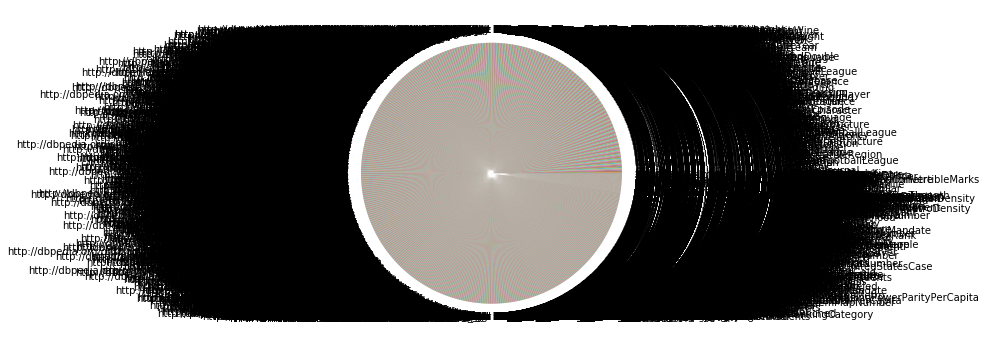

In [590]:
subject["count"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

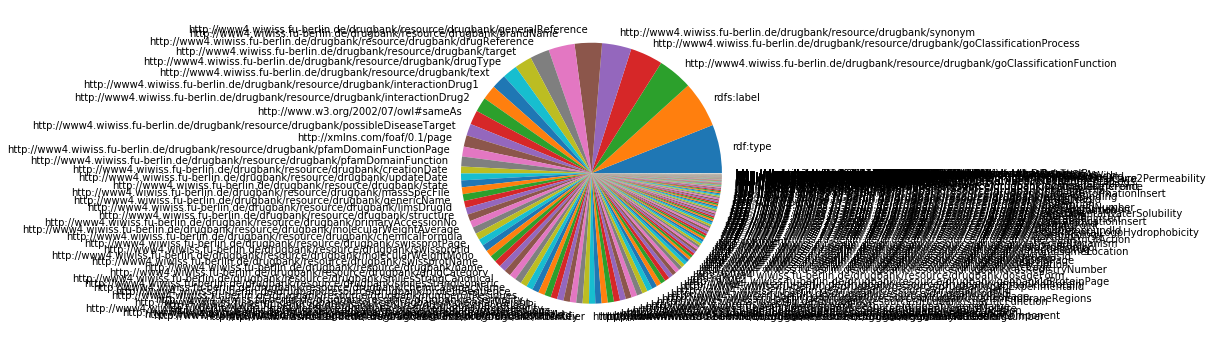

In [631]:
properties["count"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

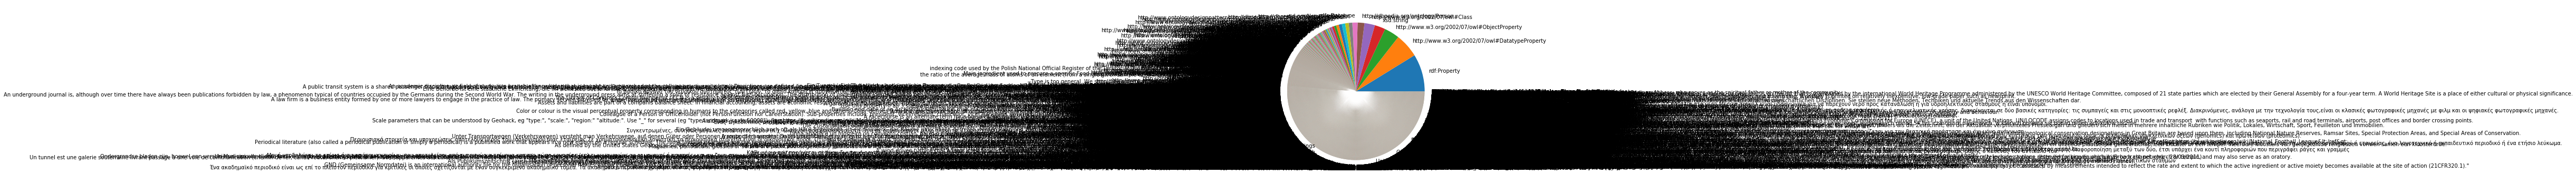

In [592]:
obj["count"].plot.pie(figsize=(6,6)).set_ylabel('')

In [628]:
properties.to_csv(input_path+'pred_statistics.csv', sep='\t')

In [630]:
statistics.math.fsum(properties["count"])


560584.0

In [496]:
def transform_to_frame(file):
    length = file.shape[0]
    s = ""
    for i in range(length):
        triplet = str(file.iloc[i][0])
        s_p_o = triplet.split(">")
        if len(s_p_o) == 4 and s_p_o[3]==" .":
            s += "\t".join(str(x)+">" for x in s_p_o[:3]) + " .\n"
        elif len(s_p_o) == 3:
            s += "\t".join(str(x)+">" for x in s_p_o).rstrip(">") + "\n"
        elif len(s_p_o) > 3:
            sub_pred = "\t".join(str(x)+">" for x in s_p_o[:2])
            obj = "".join(str(x)+"^" for x in s_p_o[2:]).rstrip(">")
            s += sub_pred + "\t" + obj + "\n"
        else:
            print("Error Line ",i)
            print(s_p_o)
    return s

In [497]:
string = transform_to_frame(dbpedia_2016)
str_io = StringIO(string)
frame_dbpedia_2016 = pd.read_csv(str_io, sep="\t", header=None)
print(frame_dbpedia_2016.shape)
frame_dbpedia_2016.head()

(31050, 3)


,0,1,2
0,<http://dbpedia.org/ontology/>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.w3.org/2002/07/owl#Ontology> .
1,<http://dbpedia.org/ontology/>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://purl.org/vocommons/voaf#Vocabulary> .
2,<http://dbpedia.org/ontology/>,<http://purl.org/vocab/vann/preferredNamespac...,"""dbo"" ."
3,<http://dbpedia.org/ontology/>,<http://purl.org/vocab/vann/preferredNamespac...,"""http://dbpedia.org/ontology/"" ."
4,<http://dbpedia.org/ontology/>,<http://purl.org/dc/terms/title>,"""The DBpedia Ontology""@en ."


In [498]:
string = transform_to_frame(dbpedia_People)
str_io = StringIO(string)
frame_dbpedia_People = pd.read_csv(str_io, sep="\t", header=None)
print(frame_dbpedia_People.shape)
frame_dbpedia_People.head()

(12511, 3)


,0,1,2
0,<http://dbpedia.org/resource/Dean_Whyte/dump2>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.w3.org/2002/07/owl#Thing> .
1,<http://dbpedia.org/resource/Dean_Whyte/dump2>,<http://dbpedia.org/ontology/abstract>,"""Dean Whyte (born 17 September 1988) is a wat..."
2,<http://dbpedia.org/resource/Dean_Whyte/dump2>,<http://xmlns.com/foaf/0.1/name>,"""Dean Whyte""@en ."
3,<http://dbpedia.org/resource/Dean_Whyte/dump2>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.ontologydesignpatterns.org/ont/du...
4,<http://dbpedia.org/resource/Dean_Whyte/dump2>,<http://www.w3.org/ns/prov#wasDerivedFrom>,<http://en.wikipedia.org/wiki/Dean_Whyte?oldi...


In [499]:
string = transform_to_frame(drugbank)
str_io = StringIO(string)
frame_drugbank = pd.read_csv(str_io, sep="\t", header=None)
print(frame_drugbank.shape)
frame_drugbank.head()

(766920, 3)


,0,1,2
0,<http://www4.wiwiss.fu-berlin.de/drugbank/reso...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#P...
1,<http://www4.wiwiss.fu-berlin.de/drugbank/reso...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#P...
2,<http://www4.wiwiss.fu-berlin.de/drugbank/reso...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#P...
3,<http://www4.wiwiss.fu-berlin.de/drugbank/reso...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#P...
4,<http://www4.wiwiss.fu-berlin.de/drugbank/reso...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#P...


In [510]:
frames = [frame_dbpedia_2016, frame_dbpedia_People, frame_drugbank]
dataset_semantic = pd.concat(frames)
export_csv = dataset_semantic.to_csv (input_path+'dbpedia_semantic.ttl', index = None, header=False, sep='\t')

In [511]:
dataset_semantic.head()

,0,1,2
0,<http://dbpedia.org/ontology/>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://www.w3.org/2002/07/owl#Ontology> .
1,<http://dbpedia.org/ontology/>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#t...,<http://purl.org/vocommons/voaf#Vocabulary> .
2,<http://dbpedia.org/ontology/>,<http://purl.org/vocab/vann/preferredNamespac...,"""dbo"" ."
3,<http://dbpedia.org/ontology/>,<http://purl.org/vocab/vann/preferredNamespac...,"""http://dbpedia.org/ontology/"" ."
4,<http://dbpedia.org/ontology/>,<http://purl.org/dc/terms/title>,"""The DBpedia Ontology""@en ."


In [512]:
table_subj = frame_dbpedia_2016[0].value_counts()
table_pred = frame_dbpedia_2016[1].value_counts()


## dbpedia_2016 statistics 

In [6]:
table_subj = frame_dbpedia_2016[0].value_counts()
table_pred = frame_dbpedia_2016[1].value_counts()
table_obj = frame_dbpedia_2016[2].value_counts()
table_subj.to_csv (input_path+'subj_statistics_dbpedia_2016.csv', header=False, sep='\t')
table_pred.to_csv (input_path+'pred_statistics_dbpedia_2016.csv', header=False, sep='\t')
table_pred.to_csv (input_path+'obj_statistics_dbpedia_2016.csv', header=False, sep='\t')

## dbpedia_People statistics

In [7]:
table_subj = frame_dbpedia_People[0].value_counts()
table_pred = frame_dbpedia_People[1].value_counts()
table_obj = frame_dbpedia_People[2].value_counts()
table_subj.to_csv (input_path+'subj_statistics_dbpedia_People.csv', header=False, sep='\t')
table_pred.to_csv (input_path+'pred_statistics_dbpedia_People.csv', header=False, sep='\t')
table_pred.to_csv (input_path+'obj_statistics_dbpedia_People.csv', header=False, sep='\t')

## drugbank statistics

In [9]:
table_subj = frame_drugbank[0].value_counts()
table_pred = frame_drugbank[1].value_counts()
table_obj = frame_drugbank[2].value_counts()
table_subj.to_csv (input_path+'subj_statistics_drugbank.csv', header=False, sep='\t')
table_pred.to_csv (input_path+'pred_statistics_drugbank.csv', header=False, sep='\t')
table_pred.to_csv (input_path+'obj_statistics_drugbank.csv', header=False, sep='\t')

In [302]:
length_tax = taxonomy.shape[0]
for index in range(length_tax):
    triplet = taxonomy.iloc[index]
    if len(triplet)<3:
        print(triplet)
    s_p_o = "\t".join(str(x) for x in triplet)
    y_type.write(s_p_o + "\n")
y_type.close

<function TextIOWrapper.close()>

In [303]:
print(s_p_o)

<wikicat_Municipalities_in_Paraná>	rdfs:subClassOf	<yagoGeoEntity> .


In [304]:
y_type= open(y_s_type,"r")
len(y_type.readlines())

24823070

In [305]:
y= open("/home/rivas/Downloads/yagoSimpleTypes.ttl","r")
len(y.readlines())

24193417

In [310]:
taxonomy[1].value_counts()

rdfs:subClassOf     629645
owl:disjointWith        42
<hasGloss>               1
Name: 1, dtype: int64

In [312]:
input_path = "/media/rivas/Data1/Data-mining/Kcap/"
y_s_type = input_path + "yagoSimpleTypes (copy).ttl"
y_type= open(y_s_type,"r+")
length = len(y_type.readlines()) - 9
y_type.seek(0)
string = ""
for n in range(9):
    y_type.readline()
for n in range(length):
    string += y_type.readline() +"\n"



In [313]:
string.count('rdf:type')

24193409

In [314]:
"""import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO"""
from io import StringIO

str_io = StringIO(string)
xc = pd.read_csv(str_io, sep="\t", header=None)

In [316]:
xc.iloc[-1]

<yagoTheme_yagoSimpleTypes>                                                                                                                                                                                                                                                                                                                                                                                                                                    <wikicat_Football_venues_in_Suriname>
<hasGloss>                                                                                                                                                                                                                                                                                                                                                                                                                                                                           rdfs:subClassOf
This file is part of the ontol

In [346]:
table_pred = y_type[1].value_counts()
table_obj = y_type[2].value_counts()
#table.to_frame()

In [347]:
export_csv = table_obj.to_csv (input_path+'obj_statistics_yagoType.csv', header=False, sep='\t')
export_csv = table_pred.to_csv (input_path+'pred_statistics_yagoType.csv', header=False, sep='\t')

In [348]:
table_subj = taxonomy[0].value_counts()
table_pred = taxonomy[1].value_counts()

In [349]:
export_csv = table_subj.to_csv (input_path+'subj_statistics_yagoTaxonomy.csv', header=False, sep='\t')
export_csv = table_pred.to_csv (input_path+'pred_statistics_yagoTaxonomy.csv', header=False, sep='\t')

In [350]:
yago_dataset = pd.read_csv(yago, delimiter='\t', header=None)

In [378]:
table_prop = yago_dataset[1].value_counts()
table_prop.to_csv (input_path+'properties_types_yagoDataset.csv', header=False, sep='\t')

In [373]:
#(yago_dataset[0] == 'Peter_Creamer').sum()
list_a = yago_dataset.index[yago_dataset[0] == 'Peter_Creamer'].tolist()
yago_dataset.iloc[list_a,:]

,0,1,2
10,Peter_Creamer,wasBornIn,Hartlepool
87750,Peter_Creamer,playsFor,Rochdale_A.F.C.
265674,Peter_Creamer,playsFor,Gateshead_F.C.
339359,Peter_Creamer,playsFor,Hartlepool_United_F.C.
347106,Peter_Creamer,playsFor,Dallas_Tornado
403581,Peter_Creamer,isAffiliatedTo,Doncaster_Rovers_F.C.
600288,Peter_Creamer,isAffiliatedTo,York_City_F.C.
601821,Peter_Creamer,isAffiliatedTo,Hartlepool_United_F.C.
722749,Peter_Creamer,playsFor,Doncaster_Rovers_F.C.
815872,Peter_Creamer,isAffiliatedTo,Rochdale_A.F.C.


In [375]:
#(y_type[0] == '<Peter_Creamer>').sum()
list_b = y_type.index[y_type[0] == '<Peter_Creamer>'].tolist()
y_type.iloc[list_b,:]

,0,1,2
5088687,<Peter_Creamer>,rdf:type,<wikicat_York_City_F.C._players> .
9429816,<Peter_Creamer>,rdf:type,<wikicat_Dallas_Tornado_players> .
9571953,<Peter_Creamer>,rdf:type,<wikicat_Doncaster_Rovers_F.C._players> .
13016567,<Peter_Creamer>,rdf:type,<wikicat_Living_people> .
18188884,<Peter_Creamer>,rdf:type,<wikicat_Hartlepool_United_F.C._players> .
19838370,<Peter_Creamer>,rdf:type,<wikicat_Middlesbrough_F.C._players> .
21820100,<Peter_Creamer>,rdf:type,<wikicat_Association_football_defenders> .
22269091,<Peter_Creamer>,rdf:type,<wikicat_North_American_Soccer_League_(1968–84...
22674164,<Peter_Creamer>,rdf:type,<wikicat_Rochdale_A.F.C._players> .
23224533,<Peter_Creamer>,rdf:type,<wikicat_English_footballers> .
